In [1]:
using Plots; pyplot();
using DelimitedFiles, Distributions;
using AugmentedGaussianProcesses;

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:935
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:935
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:937
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:937
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:938
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:938
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:939
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:939
┌ Warning: `geti

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1100
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:1100
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_set_axis_colors(::Plots.Subplot{Plots.PyPlotBackend}, ::PyCall.PyObject, ::Plots.Axis) at pyplot.jl:914
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:914
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_set_axis_colors(::Plots.Subplot{Plots.PyPlotBackend}, ::PyCall.PyObject, ::Plots.Axis) at pyplot.jl:915
└

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_bbox_axislabel(::PyCall.PyObject, ::String) at pyplot.jl:288
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:288
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_bbox_title(::PyCall.PyObject) at pyplot.jl:304
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:304
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_bbox_title(::PyCall.PyObject) at pyplot.jl:304
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:304
┌ Warning: `getindex(o::PyObject, s::Symbol)` is d

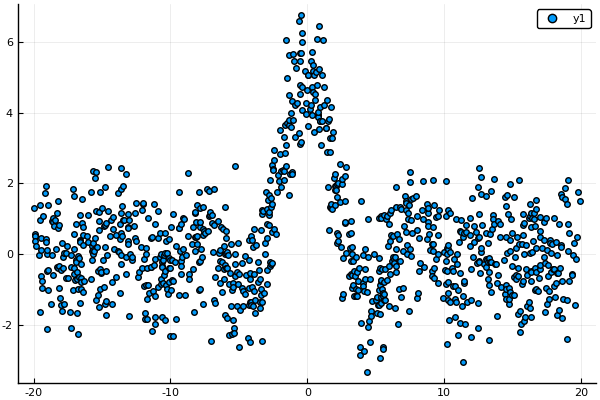

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _update_plot_object(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1304
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:1304
┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = _show(::Base64.Base64EncodePipe, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1343
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:1343
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _show(::Base64.Base64EncodePipe, ::MIME{Symbol("image/png")}, ::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1343
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:13

In [2]:
N = 1000
X = reshape((sort(rand(N)).-0.5).*40.0,N,1)
function latent(x)
    5.0.*sin.(x)./x
end
Y = (latent(X)+randn(N))[:];
scatter(X,Y)

In [3]:
# Run sparse classification with increasing number of inducing points
Ms = [4, 8, 16, 32, 64]
models = Vector{AbstractGP}(undef,length(Ms)+1)
kernel = RBFKernel(1.0)
for (index, num_inducing) in enumerate(Ms)
    m = SVGP(X, Y, kernel,GaussianLikelihood(),AnalyticInference(),num_inducing,Autotuning=true)
    println("Training with $(num_inducing) points")
    @time train!(m,iterations=100)
    models[index]=m;
end

Training with 4 points
  6.482361 seconds (28.02 M allocations: 1.490 GiB, 9.70% gc time)
Training with 8 points
  0.088857 seconds (494.20 k allocations: 145.622 MiB, 19.93% gc time)
Training with 16 points
  0.148745 seconds (494.20 k allocations: 244.806 MiB, 14.92% gc time)
Training with 32 points
  0.327020 seconds (494.20 k allocations: 448.598 MiB, 11.94% gc time)
Training with 64 points
  0.754530 seconds (496.07 k allocations: 878.053 MiB, 9.58% gc time)


In [4]:
mfull = VGP(X, Y, kernel,GaussianLikelihood(),AnalyticInference(),Autotuning=true)
println("Training with full model")
@time train!(mfull,iterations=5);
models[end]=mfull;

Training with full model
  1.883811 seconds (2.79 M allocations: 476.823 MiB, 16.18% gc time)


In [5]:
function compute_Grid(model,nGrid=50)
    mins = -20
    maxs = 20
    Xplot = collect(range(mins[1],stop=maxs[1],length=nGrid))
#     Xplot = hcat([j for i in xlin, j in ylin][:],[i for i in xlin, j in ylin][:])
    y = proba_y(model,Xplot)
    return (y,Xplot)
    end;

In [6]:
function plotdata(X,Y)
    plot(X,Y,t=:scatter,alpha=0.33,markerstrokewidth=0.0,lab="",size=(300,500));
end;

In [9]:
function plotcontour(model,X,Y)
    nGrid = 100
    (predic,x) = compute_Grid(model,nGrid);
    plotdata(X,Y)
    if in(:Z,fieldnames(typeof(model)))
        plot!(model.Z[1][:,1],zero(model.Z[1][:,1]),msize=2.0,color="black",t=:scatter,lab="")
    end
    return plot!(x,predic,title=(in(:Z,fieldnames(typeof(model))) ? "M = $(model.nFeature)" : "full"),color="red",lab="",linewidth=3.0)
end;

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_add_series(::Plots.Plot{Plots.PyPlotBackend}, ::Plots.Series) at pyplot.jl:443
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:443
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:976
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:976


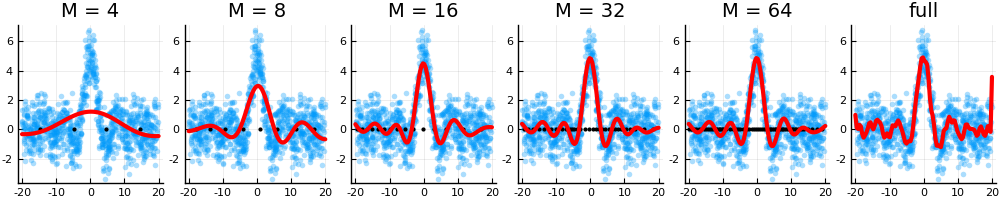

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:976
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:976
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:977
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl:977
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:977
└ @ Plots /home/theo/.julia/packages/Plots/QYETN/src/backends/pyplot.jl

In [10]:
plot(broadcast(x->plotcontour(x,X,Y),models)...,layout=(1,length(models)),size=(1000,200))